In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
Url = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'

In [3]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [5]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
data_columns = ['Country', 'Region', 'Happiness Score','Economy (GDP per Capita)','Family', 'Health (Life Expectancy)','Freedom','Generosity','Trust (Government Corruption)']

In [7]:
data = data[data_columns].copy()

In [8]:
happy_df = data.rename({'Country name':'Country_name','Region':'region','Happiness Score':'Happiness_Score','Economy (GDP per Capita)':'GDP_per_Capita','Family':'family','Health Life Expectancy':'Health_Life Expectancy','Freedom':'freedom', 'Generosity':'generosity','Trust Government Corruption':'Trust_Government_Corruption' }, axis=1)

In [9]:
happy_df.head()

,Country,region,Happiness_Score,GDP_per_Capita,family,Health (Life Expectancy),freedom,generosity,Trust (Government Corruption)
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [10]:
happy_df.isnull().sum()

Country                          0
region                           0
Happiness_Score                  0
GDP_per_Capita                   0
family                           0
Health (Life Expectancy)         0
freedom                          0
generosity                       0
Trust (Government Corruption)    0
dtype: int64

Text(0, 0.5, 'GDP per Capita')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


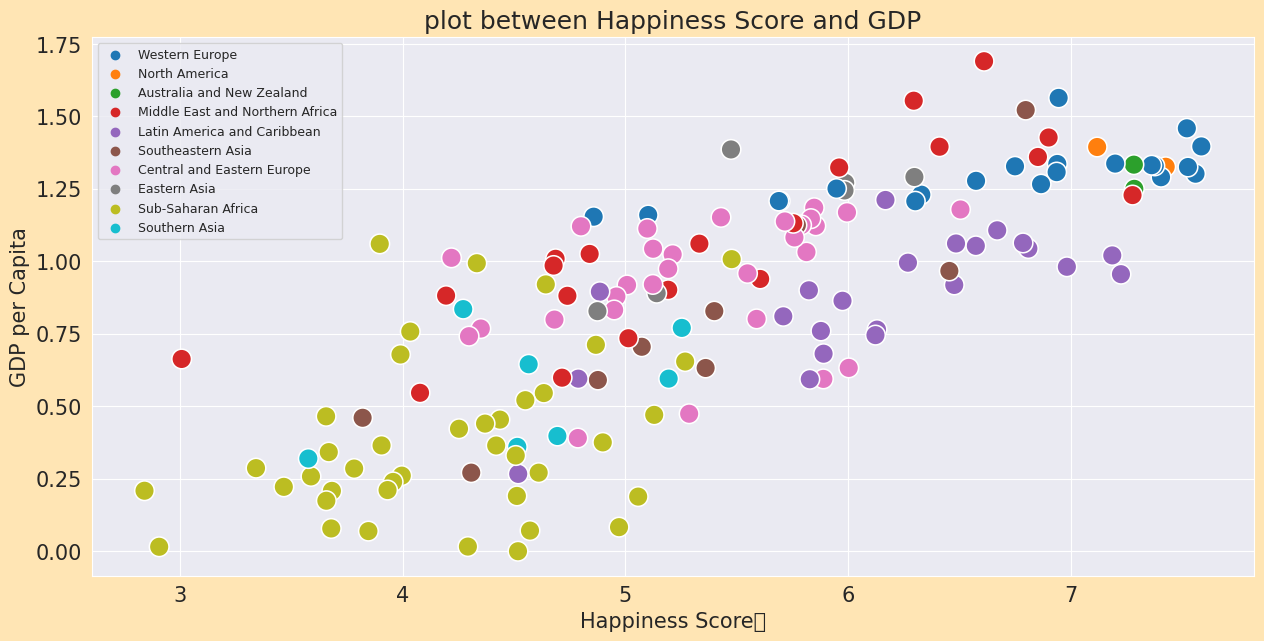

In [11]:
#plot b/w happiness and GDP

plt.rcParams['figure.figsize'] = (15,7)
plt.title('plot between Happiness Score and GDP')
sns.scatterplot(x = happy_df.Happiness_Score, y = happy_df.GDP_per_Capita, hue = happy_df.region, s=200);

plt.legend(loc = 'upper left', fontsize = '09')
plt.xlabel('Happiness Score	')
plt.ylabel('GDP per Capita')

In [12]:
gdp_region = happy_df.groupby('region')['GDP_per_Capita'].sum()
gdp_region

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP_per_Capita, dtype: float64

Text(0, 0.5, '')

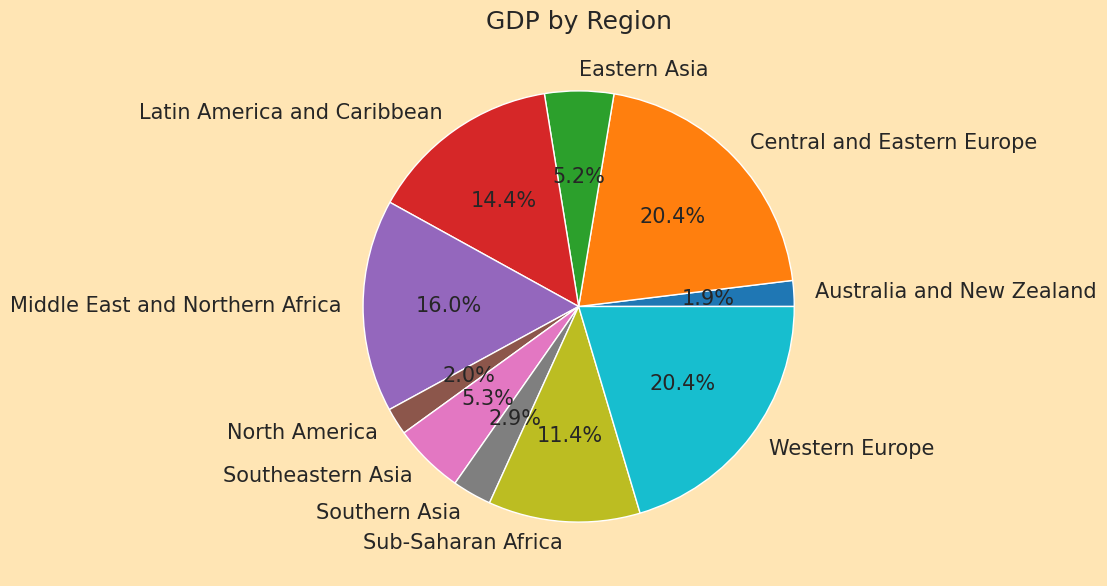

In [13]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [14]:
# Total countries 

total_country = happy_df.groupby('region')[['Country']].count()
print(total_country)

                                 Country
region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


<ipython-input-15-bdf1c78b7daa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor= happy_df.corr(method = "pearson")
<ipython-input-15-bdf1c78b7daa>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor, dtype = np.bool),


<Axes: >

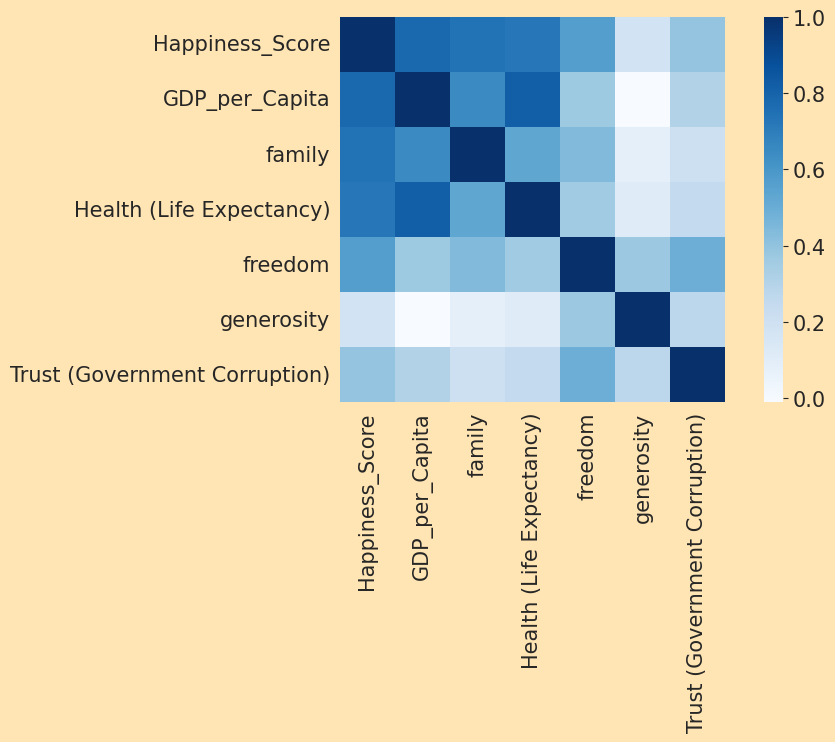

In [15]:
# Correlation Map

cor= happy_df.corr(method = "pearson")
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype = np.bool),
           cmap = "Blues", square=True, ax=ax)

In [16]:
corruption = happy_df.groupby('region')[['Trust (Government Corruption)']].mean()
corruption

,Trust (Government Corruption)
region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

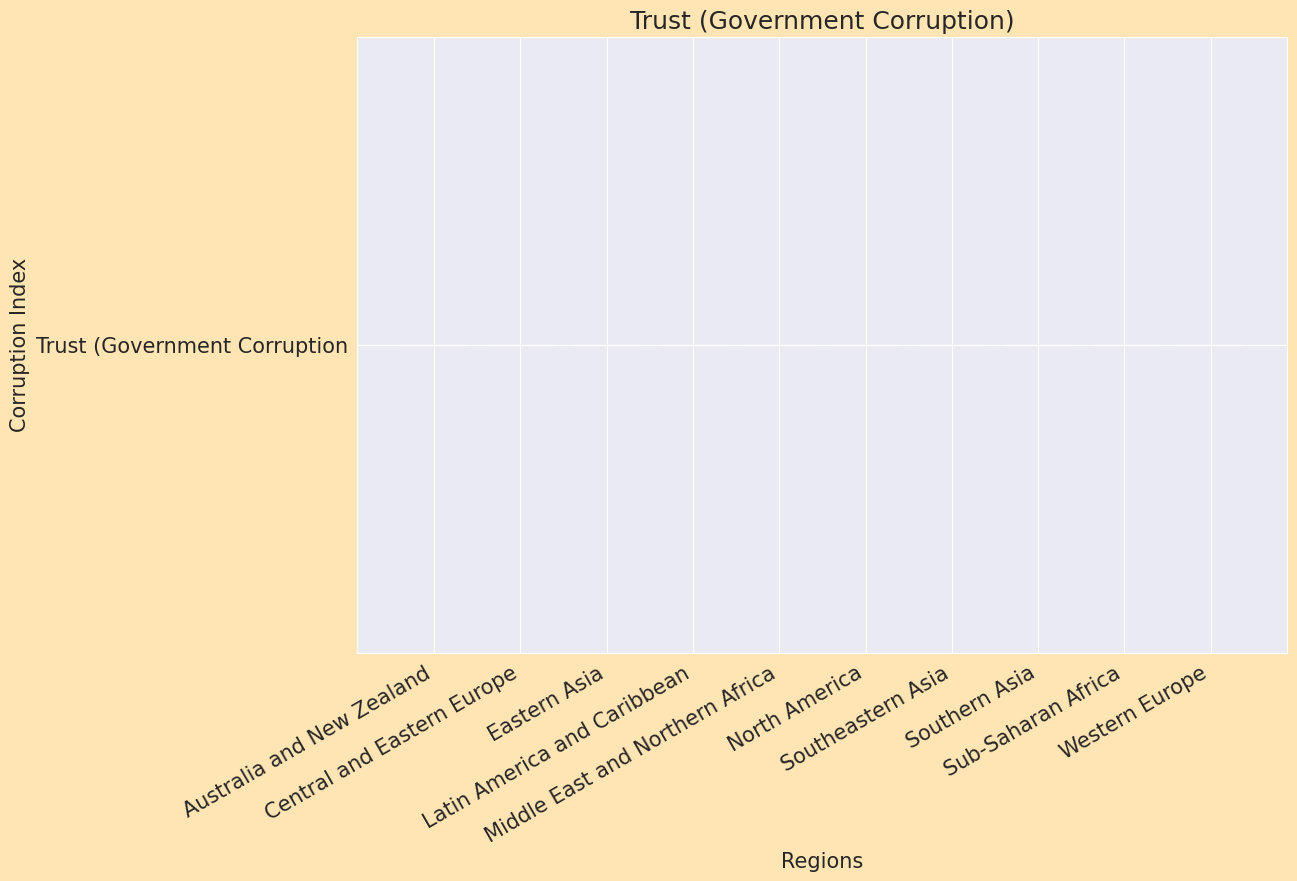

In [17]:
 plt.rcParams['figure.figsize'] = (12,8)
 plt.title('Trust (Government Corruption)')
 plt.xlabel('Regions', fontsize = 15)
 plt.ylabel('Corruption Index',fontsize = 15 )
 plt.xticks(rotation = 30, ha='right')
 plt.bar(corruption.index,'Trust (Government Corruption')

In [18]:
 top_10 = happy_df.head(10)
 bottom_10 = happy_df.tail(10)

In [ ]:
fig, axes= plt.subplots(1,2,  figsize = (16,6))
plt.tight_layout(pad=2)
xlabels= top_10.Country
axes[0].set_title('top 10 happiest countries life expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.Country, y=top_10.Health_Life Expectancy, ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Life Expectancy')

xlabels=bottom_10.Country_name
axes[1].set_title('Bottom 10 least happy countries life expectancy')
axes(1).set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.Country, y= bottom_10.Health_Life Expectancy, ax=axes[1])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Life Expectancy')

Text(0, 0.5, 'Happiness_Score')

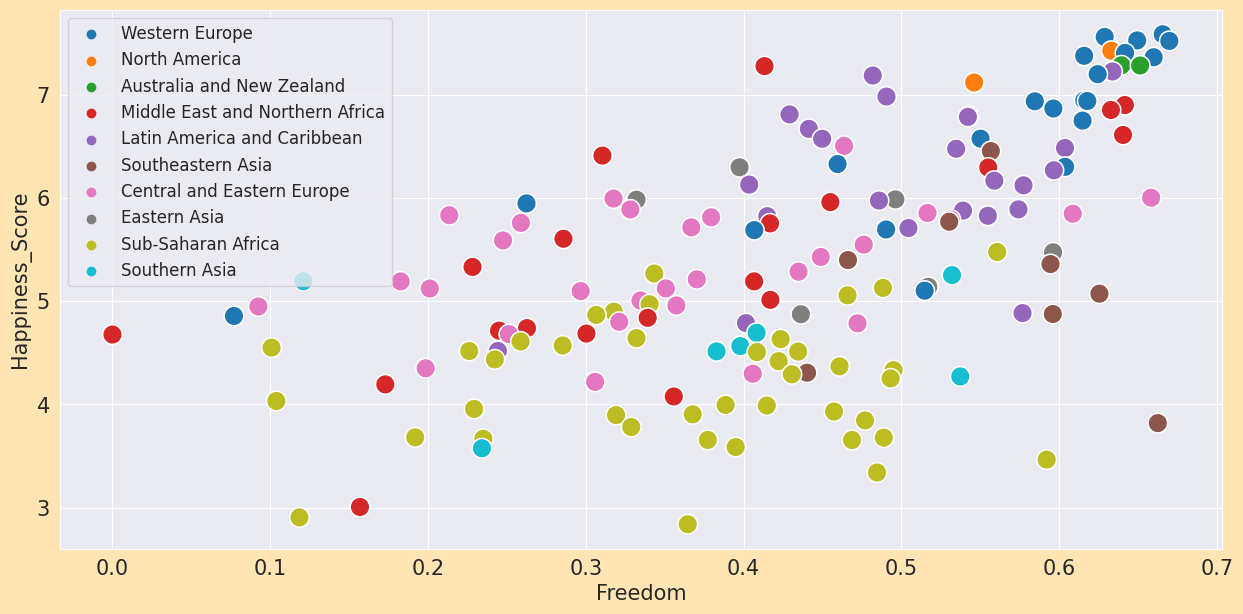

In [21]:
plt.rcParams['figure.figsize']= (15, 7)
sns.scatterplot(x = happy_df.freedom, y=happy_df.Happiness_Score, hue = happy_df.region, s=200)
plt.legend(loc = 'upper left', fontsize ='12')
plt.xlabel('Freedom')
plt.ylabel('Happiness_Score')


In [ ]:
country = happy_df.sort_values(by= 'Trust_Government_Corruption').head(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Countries with Most Perception of Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption index', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.Country, country.Trust (Government Corruption ) 

In [ ]:
# Corruption vs happiness

plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = happy_df.Happiness_Score, y=happy_df.Trust (Government Corruption, hue=happy_df.region, s=200)
plt.legend(loc='lower left', fontsize = '14')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')